# Lab 01 - Wprowadzenie do AI

Celem tego notebook'a jest przejście przez podstawowe zagadnienia związane z uczeniem maszynowym. Wszystko można wykonać u siebie lokalnie instalując biblioteki z pliku `requirements.txt`, natomiast można wszystko również wykonać przy wykorzystaniu Google Colab

[![Otwórz w Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aghbit/BIT-AI-Intro/blob/main/lab_01/main.ipynb)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from itertools import product
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

Użyjemy tutaj następujących bibliotek:
- **pandas** - do wczytywania i przetwarzania danych
- **scikit learn** - do uczenia maszynowego i pobrania gotowych zbiorów danych
- **matplotlib.pyplot** - do rysowania wykresów
- **numpy** - do operacji na macierzach

---
## Założenia

Na samym początku, będziemy starali się trzymać dosyć odważnego założenia*. Model to czarna skrzynka, do której możemy wrzucić dane i w jakiś sposób ocenić ich jakość. Jeżeli będziemy mieli więcej czasu, to postaramy się dojść do tego, co się dzieje w środku tej czarnej skrzynki, natomiast to nie jest coś od czego chcemy zacząć.


<small><small><small>*Założenie jest to prawdziwe dla zasadniczo każdego, kto nie pracuje naukowo w tej dziedzinie. Reszta osób przez lata doświadczenia ma jakieś pojęcie jak te rzeczy robić (choć też nie zawsze XD), natomiast zwykle to się sprowadza to wykorzystania optymalizacji hiperparametrów dla standardowych modeli oraz doboru metryki pasującej pod cele firmy ;-;</small></small></small>

---
## Teoria

Zasadniczo AI działa dokładnie tak samo jak algorytmy, które były przez was pisane na WDI, a teraz na ASD. Praktycznie wszystkie algorytmy możemy sprowadzić do trzech faz

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/algo.svg?raw=1" width="800"/>

Jednak czasami okazuje się, że problemy z którymi się mierzymy są tak trudne, że nie jesteśmy w stanie ich prosto rozwiązać. Przykładowo choćby problemy klasyfikacji kwiatków czy wyceny nieruchomości. Nie wiemy w jaki sposób na podstawie wymiarów liści określić do jakiej rodziny należą kwiaty. Tym bardziej nie znamy żadnego wzoru na cenę mieszkań. W takim przypadku przychodzi nam z pomocą statystyka, którą ładnie nazywamy sztuczną inteligencją. Ponieważ robimy "mądre zgadywanie", to wyniki nie zawsze będą prawidłowe. Naszym celem jest jednak zminimalizowanie błędu.

- Dane

  Skoro chcemy wykorzystać statystykę, to musimy mieć jakieś dane. Na początku skupimy się na dwóch zbiorach danych:
    - **Iris** – zbiór danych zawierający informacje o kwiatach irysów. Tutaj będziemy przypisywać kwiatki do odpowiednich gatunków. Jest to problem **klasyfikacji**.
    - **Wine** – zbiór danych zawierający informacje o winach. Tutaj będziemy przewidywać ilość alkoholu w winie na podstawie innych cech. Jest to problem **regresji**.

- Model

  Model to funkcja, która na podstawie danych wejściowych zwraca nam wynik. Jest to analogiczne do standardowego algorytmu. W tym labie nie będziemy analizować różnych modeli, skupimy się na KNN (K-Nearest Neighbors), który jest jednym z najprostszych modeli.

  - K-Nearst Neighbors

    Idea tego algorytmu jest bardzo prosta. W przypadku klasyfikacji, aby określić do jakiej klasy należy dany punkt, sprawdzamy do jakiej klasy należy większość z $k$ najbliższych punktów. W przypadku regresji, zwracamy zwykle średnią wartość z $k$ najbliższych punktów.

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/KNN.svg?raw=1" width="800"/>

- Funkcja kosztu

  Na samym końcu musimy jakoś ocenić, jak dobrze działa nasz model. W tym celu wybieramy pewną funkcję kosztu.
  -  **Klasyfikacja** – Tutaj użyjemy dokładności (accuracy), która mówi nam ile procent punktów zostało poprawnie sklasyfikowanych.
  - **Regresja** – Tutaj użyjemy średniego błędu bezwzględnego (Mean Absolute Error), który mówi nam o ile średnio nasze przewidywania różnią się od prawdziwych wartości.

---
## Przykłady

**Klasyfikacja**

  Zacznijmy od klasyfikacji. Naszym celem jest przypisanie kwiatków do odpowiednich gatunków. Na samym początku wczytajmy dane i zobaczmy jak wyglądają

In [ ]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_arr = np.concatenate([iris_X, iris_y.reshape(-1, 1)], axis=1)
df_iris = pd.DataFrame(
    iris_arr,
    columns=iris.feature_names + ['target']
)
df_iris = df_iris.sample(frac=1).reset_index(drop=True)
df_iris['target'] = df_iris['target'].astype(int)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.8,2.8,5.1,2.4,2
1,6.0,2.2,4.0,1.0,1
2,5.5,4.2,1.4,0.2,0
3,7.3,2.9,6.3,1.8,2
4,5.0,3.4,1.5,0.2,0


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Na podstawie powyższych komórek możemy zauważyć, że mamy 150 kwiatków, które należą do jednej z trzech klas.

Dla każdego kwiatka mamy 4 cechy:
  - długość kielicha
  - szerokość kielicha
  - długość płatka
  - szerokość płatka

Wszystkie wartości są liczbowe, co wynika z tego w jaki sposób ten dataset jest przechowywany przez **scikit-learn**. więc nie musimy ich w żaden sposób przetwarzać. Możemy od razu przejść do trenowania modelu.

- train-test split

  Na samym początku podzielmy nasz zbiór danych na dwa zbiory:
  - treningowy - na którym będziemy trenować nasz model
  - testowy - na którym będziemy oceniać nasz model

  Idea idąca za tym podejściem jest taka, żeby nasz model nie widział danych testowych podczas trenowania. W ten sposób sprawdzamy jak dobrze nasz model działa na danych, które nie widział. Jest to bardzo ważne, ponieważ naszym celem jest generalizacja, czyli umiejętność przewidywania wartości dla nowych danych.

  W tym celu użyjemy funkcji **train_test_split** z biblioteki **scikit-learn**. Funkcja ta przyjmuje jako argumenty:
  - dane
  - test_size - procent danych, które mają trafić do zbioru testowego. W naszym przypadku 25%

In [ ]:
iris_train, iris_test = train_test_split(df_iris, test_size=0.25)

- trenowanie modelu

  Na samym końcu trenujemy nasz model. W tym celu użyjemy klasy **KNeighborsClassifier** z biblioteki **scikit-learn**. Jako argument podajemy liczbę sąsiadów, którą chcemy użyć. W tym przypadku użyjemy 3.

In [ ]:
iris_model = KNeighborsClassifier(n_neighbors=3)
iris_model.fit(iris_train[iris.feature_names], iris_train['target'])

KNeighborsClassifier(n_neighbors=3)

- ocena modelu

  Na samym końcu oceniamy nasz model. W tym celu użyjemy funkcji **accuracy_score** z biblioteki **scikit-learn**. Funkcja ta przyjmuje dwa argumenty:
  - prawdziwe wartości
  - przewidywane wartości

  Wartość zwracana przez funkcję to procent poprawnie sklasyfikowanych punktów.

In [ ]:
iris_pred = iris_model.predict(iris_test[iris.feature_names])
acc = 100 * accuracy_score(iris_test['target'], iris_pred)
print(f"Accuracy: {round(acc, 2)}%")

Accuracy: 94.74%


---
**Regresja**

  Przejdźmy teraz do regresji. Naszym celem jest przewidzenie ilości alkoholu w winie na podstawie innych cech. Proces będzie bardzo podobny do klasyfikacji.

In [ ]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_arr = np.concatenate([wine_X, wine_y.reshape(-1, 1)], axis=1)
df_wine = pd.DataFrame(
    wine_arr,
    columns=wine.feature_names + ['region']
)
df_wine = df_wine.sample(frac=1).reset_index(drop=True)
df_wine['region'] = df_wine['region'].astype(int)

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
0,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.5,1.04,2.77,660.0,1
1,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.5,0.95,2.26,625.0,1
2,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.6,0.59,1.30,500.0,2
3,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.0,0.60,1.68,830.0,2
4,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.3,1.28,2.88,1310.0,0


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  regio

In [ ]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
wine_train, wine_test = train_test_split(df_wine, test_size=0.25)
wine_model = KNeighborsRegressor(n_neighbors=1)
wine_model.fit(wine_train.drop(columns='alcohol'), wine_train['alcohol'])
wine_pred = wine_model.predict(wine_test.drop(columns='alcohol'))
mae = mean_absolute_error(wine_test['alcohol'], wine_pred)
print(f"Mean Absolute Error: {round(mae, 3)}")

Mean Absolute Error: 0.614


---
## Normalizacja danych

Wrzucenie jednak danych do modelu bez większego myślenia nie jest czymś, co odróżnia nas od małpy. Prawdziwa zabawa zaczyna się w miejscu kiedy zaczniemy patrzeć co nasze dane nam mówią.

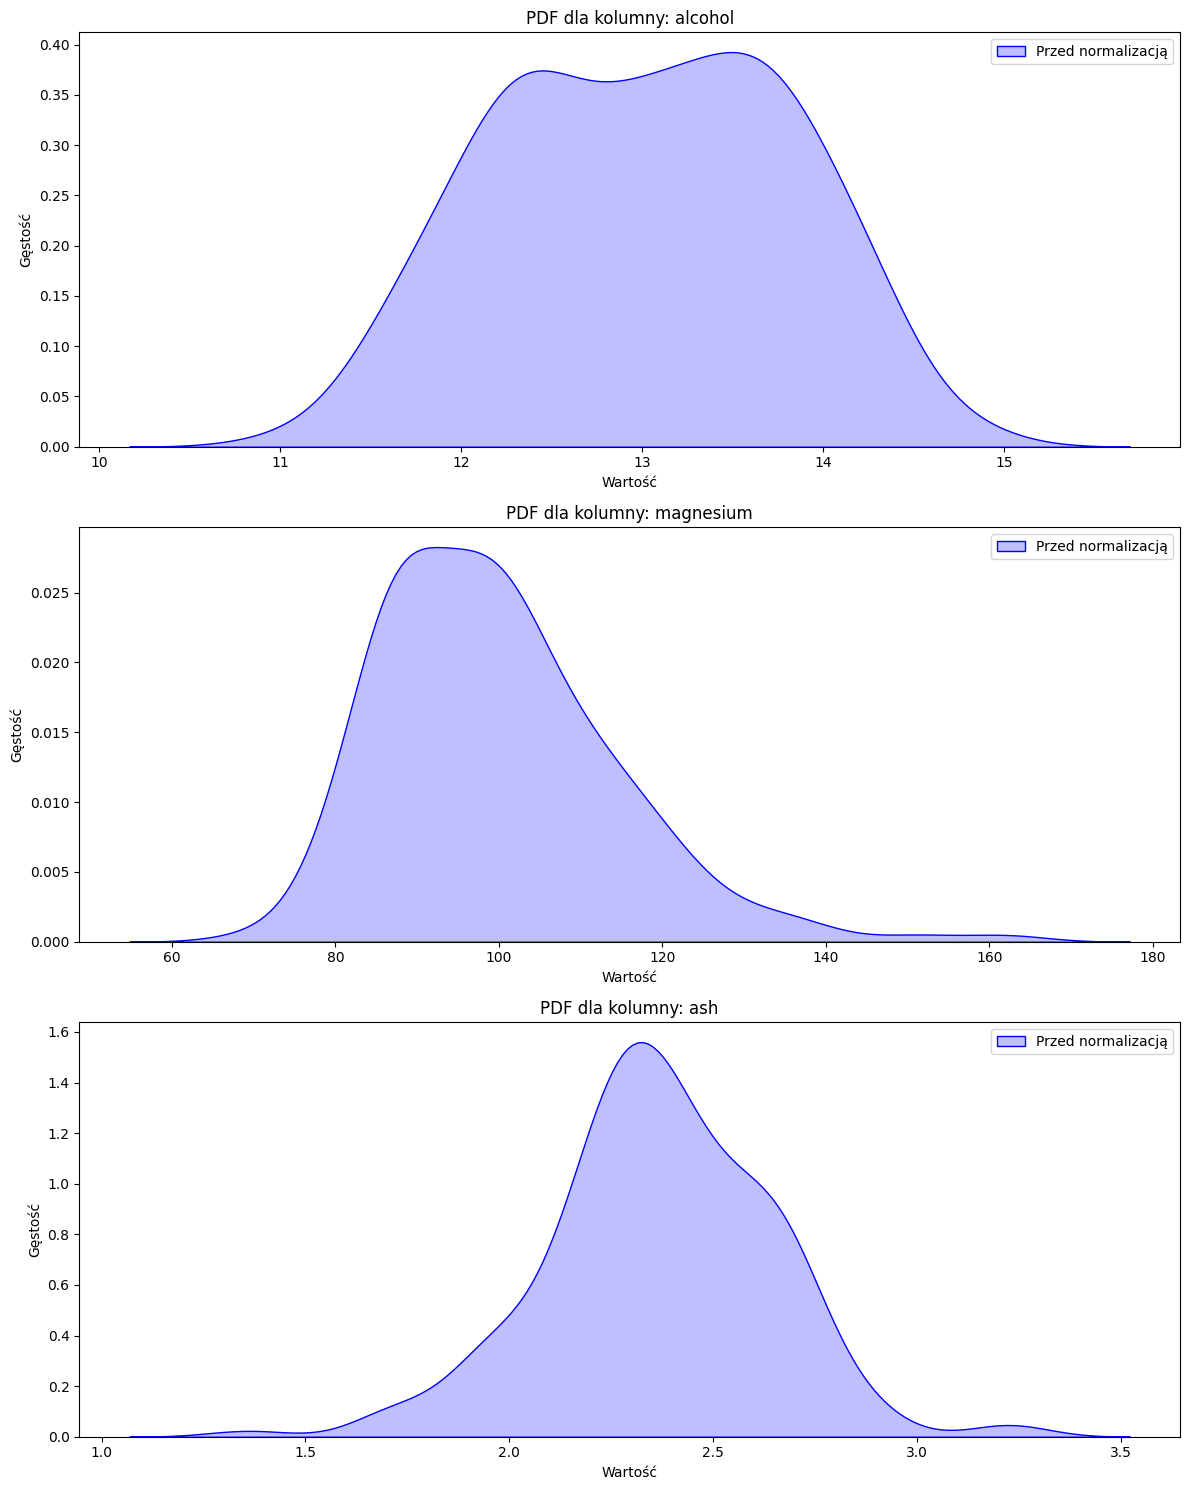

In [ ]:
columns = ['alcohol', 'magnesium', 'ash']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

for ax, col in zip(axes, columns):
    sns.kdeplot(df_wine[col], ax=ax, label='Przed normalizacją', linestyle='-', color='blue', fill=True)
    ax.set_title(f'PDF dla kolumny: {col}')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Gęstość')
    ax.legend()

plt.tight_layout()
plt.show()


KNN robi predykcje na podstawie odległości punktów. Patrząc po naszych danych `magnesium` ma wartości rzędu kilkadziesiąt, a `ash` wartości rzędu kilku. To znaczy, że wcześniej `magnesium` miał bardzo duży wpływ na wynik. Dlatego zastosujemy normalizację danych:

$$V=\frac{V - \text{mean}(V)}{\text{std}(V)}$$

Dzięki temu pozbywamy się "ludzkich" jednostek, a nasz rozkłady wartości stają się bardziej matematyczne

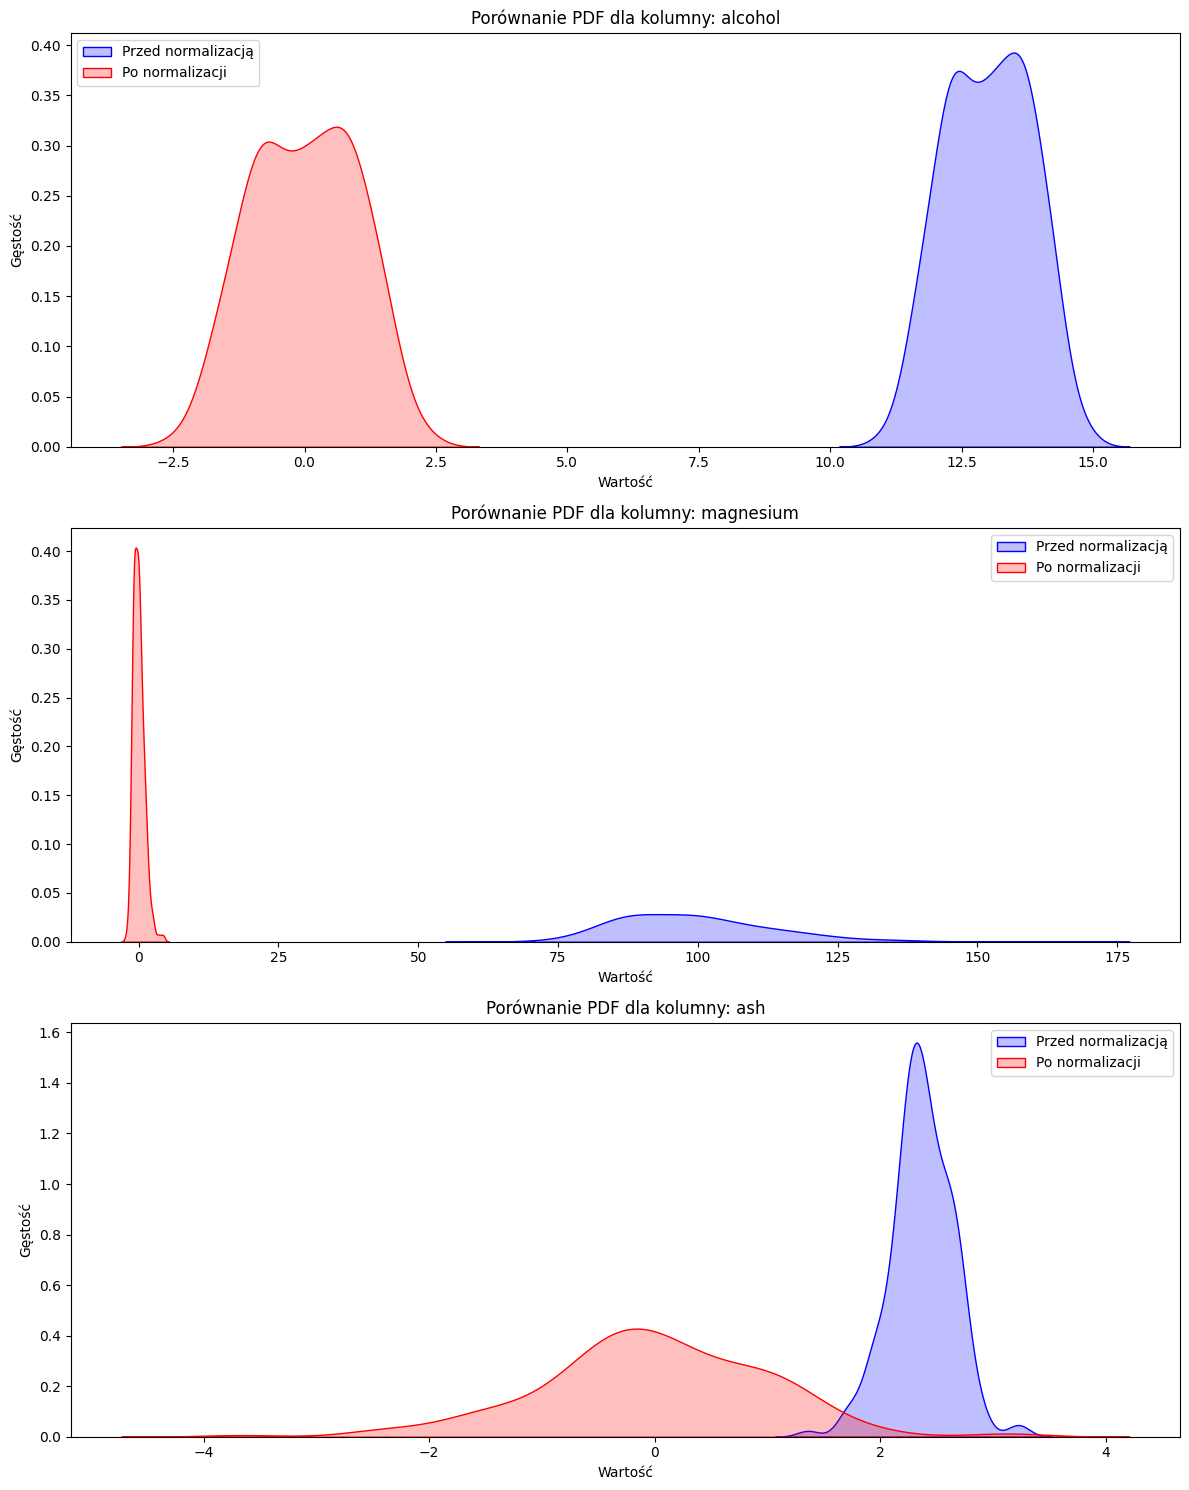

In [ ]:
columns = ['alcohol', 'magnesium', 'ash']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

for ax, col in zip(axes, columns):
    sns.kdeplot(df_wine[col], ax=ax, label='Przed normalizacją', linestyle='-', color='blue', fill=True)
    normalized = (df_wine[col] - df_wine[col].mean()) / df_wine[col].std()
    sns.kdeplot(normalized, ax=ax, label='Po normalizacji', linestyle='-', color='red', fill=True)
    ax.set_title(f'Porównanie PDF dla kolumny: {col}')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Gęstość')
    ax.legend()

plt.tight_layout()
plt.show()

Zastosujmy to na naszych danych i sprawdźmy jak zmieniły się rozkłady wartości

In [ ]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_arr = np.concatenate([wine_X, wine_y.reshape(-1, 1)], axis=1)
df_wine = pd.DataFrame(
    wine_arr,
    columns=wine.feature_names + ['region']
)

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
### HERE! ###
avg = df_wine.mean()
std = df_wine.std()
df_wine = (df_wine - avg) / std

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.210529
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,-1.210529
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,-1.210529
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,-1.210529
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.210529


In [ ]:
wine_train, wine_test = train_test_split(df_wine, test_size=0.25)
wine_model = KNeighborsRegressor(n_neighbors=1)
wine_model.fit(wine_train.drop(columns='alcohol'), wine_train['alcohol'])
wine_pred = wine_model.predict(wine_test.drop(columns='alcohol'))
print(wine_pred)

[-1.23255145  0.0854641   1.25566482 -0.65361004 -0.60433843  0.6151339
 -1.39268418 -0.49347731 -0.77678907  0.92308146 -0.77678907  0.96003516
  0.89844565  0.19632522  2.15487169 -0.78910697 -1.13400823  1.60056608
 -0.92460389  1.10784999 -0.49347731  0.6397697  -0.65361004  0.71367712
 -0.78910697  1.39116174  0.59049809  1.47738706 -0.82606067 -1.70063174
  1.6867914   1.35420804 -1.02314711  0.44268327  0.03619249  0.29486844
 -0.18552975 -1.66367803 -0.49347731 -0.16089395  0.6151339  -1.03546501
  0.6274518  -1.65136013 -0.9615576 ]


To co widzimy powyżej, to są nasze predykcje. Natomiast jak można prosto zauważyć, występują tutaj jakieś wartości ujemne, co nie ma sensu w przypadku predyckji ilości alkoholu. Wszystko to wynika z tego, że zrobiliśmy normalizację również na kolumnie **alcohol**, więc musimy teraz to naprawić.

In [ ]:
### HERE! ###
wine_y_real = wine_test['alcohol'].values * std['alcohol'] + avg['alcohol']
wine_pred = wine_pred * std['alcohol'] + avg['alcohol']

mae = mean_absolute_error(wine_y_real, wine_pred)
print(f"Mean Absolute Error: {round(mae, 3)}")

Mean Absolute Error: 0.538


Normalizacja danych poprawiła wynik o ok. 0.8pp. Nie powinno być to zaskoczeniem, jeżeli weźmiemy pod uwagę, że KNN bazuje na odległościach pomiędzy punktami, a większość pomiarów jest w mierzona w jednostkach zrozumiałych dla człowieka.

---
## One Hot Encoding

Z danymi powyżej mamy jeden problem. Cecha region jest liczbą tylko dlatego, że zrobiliśmy ją taką dla wygody. W rzeczywistości jest to cecha kategoryczna, czyli taka, która nie ma sensu w kontekście liczbowym. W takim przypadku możemy zastosować **One Hot Encoding**. Polega on na zamianie jednej kolumny na $n$ kolumn, gdzie $n$ to liczba unikalnych wartości w kolumnie. W każdej z nowych kolumn znajduje się 1, jeżeli dany wiersz należy do danej klasy, a w pozostałych 0.

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/ohe.png?raw=1" width="800"/>

In [ ]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_arr = np.concatenate([wine_X, wine_y.reshape(-1, 1)], axis=1)
df_wine = pd.DataFrame(
    wine_arr,
    columns=wine.feature_names + ['region']
)
df_wine = df_wine.sample(frac=1).reset_index(drop=True)
df_wine['region'] = df_wine['region'].astype(int)

### HERE! ###
df_wine = pd.get_dummies(df_wine, columns=['region'])

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region_0,region_1,region_2
0,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,False,False,True
1,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,False,True,False
2,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,False,False,True
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,False,True,False
4,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,True,False,False


Do tego co już otrzymaliśmy powyżej, dodamy jeszcze normalizację danych.

In [ ]:
avg = df_wine.mean()
std = df_wine.std()
df_wine = (df_wine - avg) / std

In [ ]:
wine_train, wine_test = train_test_split(df_wine, test_size=0.25)
wine_model = KNeighborsRegressor(n_neighbors=1)
wine_model.fit(wine_train.drop(columns='alcohol'), wine_train['alcohol'])
wine_pred = wine_model.predict(wine_test.drop(columns='alcohol'))
wine_y_real = wine_test['alcohol'].values * std['alcohol'] + avg['alcohol']
wine_pred = wine_pred * std['alcohol'] + avg['alcohol']
mae = mean_absolute_error(wine_y_real, wine_pred)
print(f"Mean Absolute Error: {round(mae, 3)}")

Mean Absolute Error: 0.571


Co ciekawe, wynik jest gorszy. Z czego to wynika? Prawdopodobnie dane region nie są aż tak znaczące w przypadku zawartości alkoholu w winie. W takim przypadku można się zastanowić nad usunięciem tej cechy, albo zmniejszenie jej wpływu na wynik. W naszym przypadku, tymczasowo zostawimy ją w spokoju.

---
## Brakujące dane

W rzeczywistości życie nie jest takie piękne jak w tych przykładach. Często mamy do czynienia z brakującymi danymi. Oczywiście najprościej by było usunąć każdy wiersz, w którym czegoś brakuje, natomiast nie jest to dobry pomysł. Najprostszym sposobem na pozbycie się brakujących danych jest uzupełnienie ich średnią wartością. W ten sposób nie wprowadzamy żadnych dodatkowych zależności, a jednocześnie nie tracimy danych.

---
## Co dalej?

O ile mamy jakieś wyniki, to naszym celem jest uzyskanie jak najlepszych wyników. W związku z tym na przykładzie danych z 'Wine' przejdziemy przez kilka technik, które być może pomogą nam uzyskać lepsze wyniki.

---
### Cross Validation

  Idea jest taka, że skoro mamy cały czas tylko jeden zbiór testowy, to nasze wyniki mogą być mocno zależne od tego jakie punkty trafiły do zbioru testowego. W związku z tym możemy podzielić nasz zbiór danych na kilka części i na każdej z nich trenować i testować nasz model. W ten sposób uzyskamy kilka wyników, które będą bardziej stabilne.

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/cross_validation.png?raw=1" width="800"/>

  W tym celu użyjemy funkcji **cross_val_score** z biblioteki **scikit-learn**. Funkcja ta przyjmuje jako argumenty:
  - model
  - dane
  - cross validation - ilość podziałów zbioru danych
  - scoring - metryka, którą chcemy użyć do oceny modelu

In [ ]:
score = cross_val_score(
    KNeighborsRegressor(n_neighbors=1),
    df_wine.drop(columns='alcohol'),
    df_wine['alcohol'],
    scoring='neg_mean_absolute_error',
    cv=4
)
print(score)

mae = -score.mean()
std = score.std()

print(f"Mean Absolute Error: {round(mae, 3)} ± {round(std, 3)}")

[-0.71033237 -0.65859718 -0.5114729  -0.76259013]
Mean Absolute Error: 0.661 ± 0.094


Jak możemy zobaczyć, wyniki wahają się od -0.78 do -0.62, więc rzeczywiście dobór danych testowych ma duże znaczenie. Dodatkowo wszystkie wartości są ujemne, natomiast to raczej jest efekt wybranego przez nas parametru **scoring**, który po prostu implementuje to w taki sposób. Dla ułatiwnia sobie życia, napiszemy teraz funkcję, która przeprowadzi nam cały trening i zwróci nam średni wynik i odchylenie standardowe z cross validation.

---
### Optymalizacja hiperparametrów


KNN w implementacji z **scikit-learn** ma kilka hiperparametrów, które możemy optymalizować. Część z nich jest zbyt ciężka żeby je teraz analizować, a część z nich odnosi się tylko do wydajności algorytmu. Wszytkie hiperparametry można znaleźć w dokumentacji [scikit-learn](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor).

My skupimy się na trzech, które będziemy optymalizować:
- **n_neighbors** - liczba sąsiadów
- **weights** - wagi, które mają być przypisane do sąsiadów
  - **uniform** - wszyscy sąsiedzi mają taką samą wagę
  - **distance** - im bliżej punktu, tym ma większą wagę
- **p** - siła metryki Minkowskiego
  - $p=1$ to metryka Manhattan
  - $p=2$ to metryka Euklidesowa

Samo ustawienie hiperparametrów jest proste, wystarczy podać je jako argumenty do klasy **KNeighborsRegressor**.

In [ ]:
params = {
    'n_neighbors': 3,
    'weights': 'uniform',
    'p': 2
}
wine_model = KNeighborsRegressor(**params)
wine_model.fit(wine_train.drop(columns='alcohol'), wine_train['alcohol'])
wine_pred = wine_model.predict(wine_test.drop(columns='alcohol'))
mae = mean_absolute_error(wine_test['alcohol'], wine_pred)
print(f"Mean Absolute Error: {round(mae, 3)}%")

Mean Absolute Error: 0.626%


Jak widać powyżej, wynik się poprawił o ~1.3pp. Czy to duża poprawa? Wcześniej widzieliśmy, że średnio zawartość alkoholu wynosi 13%, więc na pewno trochę to robi różnicę.

Natomiast zgadywanie ręczne hiperparametrów to raczej słaby pomysł. Dlatego też mamy narzędzia, które robią to za nas.
- **Grid Search** - sprawdza wszystkie możliwe kombinacje hiperparametrów
- **Random Search** - sprawdza losowe kombinacje hiperparametrów
- **Bayesian Optimization** - wykorzystuje statystykę do optymalizacji hiperparametrów
- **Optuna** - biblioteka, która implementuje różne algorytmy optymalizacji hiperparametrów

Na początku zaimplementujemy kilka funkcji pomocniczych

In [ ]:
def log_parameters(params):
    print(f"Parameters:")
    for k, v in params.items():
        print(f"\t{k}: {v}")

def log_scores(mean, std):
    print(f"Mean Absolute Error: {round(mean, 3)} ± {round(std, 3)}", end='\n' + 60 * '-' + '\n')

def run_knn_cv(verbose=0, **params):
    model = KNeighborsRegressor(**params)
    scores = cross_val_score(
        model,
        df_wine.drop(columns='alcohol'),
        df_wine['alcohol'],
        scoring='neg_mean_absolute_error',
        cv=4
    )
    mean, std = -scores.mean(), scores.std()
    if verbose > 0:
        if verbose > 1:
            log_parameters(params)
        log_scores(mean, std)
    return mean, std

A teraz zaimplementujemy **Grid Search**, który jest najprostszym z nich. Warto zaznaczyć, że uruchomienie **Grid Search** może być kosztowne obliczeniowo, więc nie zawsze jesteśmy w stanie to zrobić.

In [ ]:
def grid_search(**params):
    keys, values = zip(*params.items())
    for v in product(*values):
        yield dict(zip(keys, v))

def run_grid_search(**params):
    best_score = float('inf')
    total_iterations = np.prod([len(v) for v in params.values()])
    best_params = None
    pbar = tqdm(grid_search(**params), total=total_iterations)

    for p in pbar:
        mean, std = run_knn_cv(**p)
        if mean < best_score:
            best_score = mean
            best_std = std
            best_params = p
        pbar.set_postfix({'Best MAE': round(best_score, 3)})

    log_parameters(best_params)
    log_scores(best_score, best_std)

I teraz możemy puścić nasz **Grid Search**

In [ ]:
params = {
    'n_neighbors': [i for i in range(1, 31)],
    'weights': ['uniform', 'distance'],
    'p': [1 + 0.1 * i for i in range(1, 31)]
}

run_grid_search(**params)

100%|██████████| 1800/1800 [00:31<00:00, 56.68it/s, Best MAE=0.474]

Parameters:
	n_neighbors: 14
	weights: distance
	p: 1.1
Mean Absolute Error: 0.474 ± 0.013
------------------------------------------------------------


Ostatecznie doszliśmy do średniego wyniku 0.474, co jest o ~1.4pp lepsze niż nasza pierwsza próba. Czy może być lepiej? Jak zwykle to zalezy.

---
## Zadanie A

Celem tego zadania, jest przeprowadzenie własnego treningu modelu KNN na zbiorze danych **Titanic**. Zbiór danych zawiera informacje o pasażerach Titanica, którzy przeżyli katastrofę. Naszym celem jest przewidzenie, czy dany pasażer przeżył czy nie. Do przetestowania jak dobre są wasze modele, wydzielimy sobie zbiór testowy, który będzie zawierał 30% danych. Na samym końcu porównamy wyniki.

In [ ]:
def train_test_split(path: Path, train_size: float=0.7) -> tuple[pd.DataFrame, pd.DataFrame]:
    df = pd.read_csv(path)
    n = len(df)
    train, test = df.iloc[:int(n * train_size)], df.iloc[int(n * train_size):]
    return train, test

df_train, df_test = train_test_split(Path('data/titanic.csv'))
X_train, y_train = df_train.drop(columns='Survived'), df_train['Survived']
X_test, y_test = df_test.drop(columns='Survived'), df_test['Survived']
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  292 non-null    int64  
 1   Pclass       292 non-null    int64  
 2   Name         292 non-null    object 
 3   Sex          292 non-null    object 
 4   Age          227 non-null    float64
 5   SibSp        292 non-null    int64  
 6   Parch        292 non-null    int64  
 7   Ticket       292 non-null    object 
 8   Fare         291 non-null    float64
 9   Cabin        60 non-null     object 
 10  Embarked     292 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 25.2+ KB


In [ ]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,292.000000,292.000000,227.000000,292.000000,292.000000,291.000000
mean,1037.500000,2.291096,30.015419,0.438356,0.359589,34.103236
std,84.437354,0.841895,14.247297,0.857332,0.839823,53.001186
min,892.000000,1.000000,0.330000,0.000000,0.000000,0.000000
25%,964.750000,1.750000,21.000000,0.000000,0.000000,7.895800
50%,1037.500000,3.000000,27.000000,0.000000,0.000000,14.400000
75%,1110.250000,3.000000,39.000000,1.000000,0.000000,28.518750
max,1183.000000,3.000000,76.000000,8.000000,6.000000,263.000000


Do uzupełnienia są dwie funkcje:
- **process_X** - Funkcja, która przyjmuje zbiór danych i zwraca zbiór danych, który można wykorzystać do trenowania modelu. Ważne jest to, żeby nie usuwać żadnych wierszy i poradzić sobie z brakującymi danymi. Kolumny można usuwać, ale warto zastanowić się czy nie można z nich wyciągnąć jakiejś informacji.
- **train_model** - Funkcja, która przyjmuje zbiór danych (**X**) i etykiety (**y**) i zwraca model. W tej funkcji należy zaimplementować trenowanie modelu KNN. Warto zwrócić uwagę, że nie musi być to jeden trening. Możemy wstawić tutaj poznane wcześniej **Cross Validation** oraz **Grid Search**.

In [ ]:
def process_X(df: pd.DataFrame) -> pd.DataFrame:
    raise NotImplementedError


def train_model(X: pd.DataFrame, y: pd.DataFrame) -> KNeighborsClassifier:
    raise NotImplementedError

I teraz możemy sprawdzić jak dobrze działa nasz model.

In [ ]:
X_train = process_X(X_train)
assert isinstance(X_train, pd.DataFrame), "process_X should return a DataFrame"

model = train_model(X_train, y_train)
assert isinstance(model, KNeighborsClassifier), "train_model should return a KNeighborsClassifier"

X_test = process_X(X_test)
y_pred = model.predict(X_test)

acc = 100 * accuracy_score(y_test, y_pred)
print(f"Result: {round(acc, 2)}%")

NotImplementedError: 

---
## Imbalanced Data

Titanic jest przykładem zbioru danych, który jest już trochę niezbalansowany. Dlaczego? Ponieważ odpowiadając za każdym razem, że pasażer nie przeżył, dostaniemy wynik rzędu 63%. W związku z tym warto zastanowić się nad co zrobić z naszymi danymi.

In [ ]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


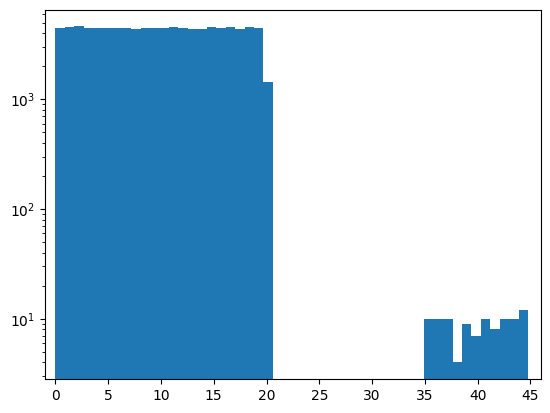

In [ ]:
imbalanced_y = np.array(
    [20 * np.random.random() for _ in range(int(1e5))] + [10 * np.random.random() + 35 for _ in range(int(1e2))]
)

plt.hist(imbalanced_y, bins=50)
plt.yscale('log')
plt.xlim(-1, 46)
plt.xticks(range(0, 46, 5))
plt.show()

W tym przypadku możemy wyjść z założenia, że przewidywanie wartości z przedziału $[20, 35]$ nie ma sensu. Oczywiście to nie jest takie proste, ale warto przemyśleć czy takie wartości rzeczywiście nie występują. Natomiast nie to jest głównym problemem w tym przypadku. Problemem jest to, że większość modeli raczej nie będzie w stanie przewidzieć wartości z przedziału $[35, 45]$, ponieważ jest ich po prostu za mało.

### Undersampling
Jednym z najprostszych sposobów na pozbycie się tego problemu jest **Undersampling**. Polega on na tym, że usuwamy część danych i staramy się uzyskać równą ilość danych dla każdej klasy.

### Oversampling

O ile usunięcie 10% danych ze zbioru, który ma ich miliony nie jest problemem, to w zbiorach bardzo niezbalansowanych może się okazać, że musimy usunąć ponad 90% wszystkich danych. Brzmi jak utrata bardzo dużej ilości informacji.

W takim przypadku możemy spróbować **Oversampling**, czyli dodanie nowych danych do zbioru. Możemy to zrobić na kilka sposobów:
- **Random Oversampling** - dodanie losowych danych do zbioru spośród istniejących danych.
- **SMOTE** - tworzymy nowe dane na podstawie istniejących danych. Idea jest taka, że bierzemy jakieś punkty leżące blisko siebie i tworzymy nowe punkty pomiędzy nimi. W ten sposób uzyskujemy nowe dane, które są podobne do istniejących danych.

### Zmiana metryki

W przypadku niezbalansowanych danych możemy również wybrać metrykę na taką, która to uwzględnia. Przykładem jest chociażby **Balanced Accuracy**, która jest średnią dokładności dla każdej klasy. W ten sposób nie będziemy karani za to, że mamy więcej danych dla jednej klasy.

---
# Metryki

Do naszych predykcji wykorzystujemy metrykę **Accuracy**, natomiast pytanie czy to jest najlepszy wybór na ocenę naszego modelu? Jak zawsze, odpowiedzią jest: To zależy.

Zanim przejdziemy do metryk dla problemu klasyfikacji, zacznijmy od przedstawienia takich pojęć jak **True Positive**, **True Negative**, **False Positive** i **False Negative**.

- **True Positive (TP)** - Prawdziwie pozytywne wyniki. Nasz model przewidział, że pasażer przeżył i tak było.
- **True Negative (TN)** - Prawdziwie negatywne wyniki. Nasz model przewidział, że pasażer nie przeżył i tak było.
- **False Positive (FP)** - Fałszywie pozytywne wyniki. Nasz model przewidział, że pasażer przeżył, ale to nie prawda.
- **False Negative (FN)** - Fałszywie negatywne wyniki. Nasz model przewidział, że pasażer nie przeżył, ale to nie prawda.

Podstawowe metryki dla problemów klasyfikacji w przypadku zbioru Titanic:
- **Accuracy** - Procent poprawnie sklasyfikowanych pasażerów, wzór:
$$\frac{TP+TN}{TP+TN+FP+FN}$$
- **Balanced Accuracy** - Procent poprawnie sklasyfikowanych pasażerów, ale z wagami dla każdej klasy, które są odwrotnością liczby danych w danej klasie, wzór:
$$\frac{TP}{TP+FP} + \frac{TN}{TN+FN}$$
- **Precision** - Określa jaki odsetek przypadków zaklasyfikowanych jako pozytywne faktycznie jest pozytywny, wzór:
$$\frac{TP}{TP+FP}$$
- **Recall** - Określa jaki odsetek rzeczywiście pozytywnych przypadków został poprawnie wykryty, wzór:
$$\frac{TP}{TP+FN}$$
- **F1 Score** - Średnia harmoniczna z **Precision** i **Recall**, wzór:
$$2\cdot \frac{Precision \cdot Recall}{Precision+Recall}$$

Tutaj warto zaznaczyć idee idącą za tymi metrykami:
- **Precision** - Chcemy, żeby jak najmniej osób, które przewidzieliśmy, że przeżyły, faktycznie nie przeżyło. Czyli chcemy, żeby nasze pozytywne wyniki były jak najbardziej pewne. Jeżeli przeniesiemy nasz problem na przykład na przewidywanie czy dany pasażer ma koronawirusa, to chcemy, żeby jak najmniej osób, które przewidzieliśmy, że mają koronawirusa, faktycznie go nie miało. Dzięki temu moglibyśmy robić testy na lotnisku tylko na osobach, które na pewno mają koronawirusa, kosztem tego, żeby zrobić testy na mniejszej ilości osób.

- **Recall** - Chcemy, żeby jak najmniej osób, które przeżyły, zostały źle sklasyfikowane. Czyli chcemy, żeby nasze negatywne wyniki były jak najbardziej pewne. Jeżeli przeniesiemy nasz problem na przykład na przewidywanie czy dany pasażer ma koronawirusa, to chcemy, żeby jak najmniej osób, które mieli koronawirusa, zostało źle sklasyfikowanych. Dzięki temu moglibyśmy zidentyfikować jak najwięcej osób, które mają koronawirusa, kosztem tego, żeby zrobić testy na lotnisku na większej ilości osób.

- **F1 Score** - Balans pomiędzy **Precision** i **Recall**. Warto zauważyć, że jest to średnia harmoniczna, a nie arytmetyczna. Dzięki temu, jeżeli jedna z metryk jest bardzo niska, to wynik również będzie niski.

Wszystkie metryki są dostępne w bibliotece **scikit-learn**.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

W przypadku problemu regresji sprawa ma się trochę inaczej. Podstawowymi metrykami są:

- **Mean Absolute Error** - Średni błąd bezwzględny, wzór:
$$\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$
- **Mean Squared Error** - Średni błąd kwadratowy, wzór:
$$\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$
- **Root Mean Squared Error** - Pierwiastek z **Mean Squared Error**, wzór:
$$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

W tym przypadku równiez mówimy o efekcie, który chcemy uzyskać, a interpretować te metryki możemy w następujący sposób.

- **MAE** - O ile średnio się myli nasz model. W przypadku problemu zakupu domu, MAE równe 10000 oznacza, że średnio nasze przewidywania różnią się od prawdziwych wartości o 10000.

- **MSE** - Idea jest taka sama jak w przypadku **MAE**, natomiast błędy są kwadratowe. W związku z tym większe błędy są bardziej karane. W przypadku problemu zakupu domu, MSE równe 10000 oznacza, że kwadrat różnicy pomiędzy przewidywaną wartością a prawdziwą wynosi średnio 10000, co w rzeczywistości mówi nam, że w rzeczywistości błąd nie powinien być większy niż **100**.

- **RMSE** - Tak naprawdę to jest lepsza wersja **MSE**. Wartość tej metryki jest w tych samych jednostkach co nasze dane, co ułatwia interpretację. Znowu model jest karany jeżeli robi większe błędy, ale tym razem jednostki zostają takie jakie powinny.

---
## Zadanie B

Przetestuj różne metryki klasyfikacji na zbiorze Titanic oraz regresji na zbiorze Wine. Spróbuj zinterpretować wyniki. Wykorzystaj najprostszy model **KNN** w obu przypadkach

In [ ]:
### HERE! ###

---
# Inne modele ML

## Regresja Liniowa

Regresja liniowa to jeden z najprostszych modeli regresji. W przypadku jednej cechy, szukamy takiej prostej postaci:

$$y = ax + b$$

Gdzie:
- $y$ - nasza zmienna, którą chcemy przewidzieć
- $x$ - nasza cecha
- $a$ - współczynnik kierunkowy
- $b$ - wyraz wolny

Dla wielowymiarowych danych, nasz wzór wygląda tak:

$$y = a_1x_1 + a_2x_2 + \ldots + a_nx_n + b$$

Do szczegółów matematycznych wrócimy w przyszłości, teraz skupimy się na właściwościach tego modelu.

In [ ]:
from sklearn.linear_model import LinearRegression

Głównym problemem regresji liniowej jest to, że zakładamy liniową zależność pomiędzy cechami, a wynikiem. W rzeczywistości takie założenie jest bardzo rzadko spełnione. Bardzo prostym przykładem, kiedy niemożliwe jest zastosowanie regresji liniowej jest zbiór danych reprezentujący operację **XOR**.

Weźmy 4 punkty:
- $(0, 0)$ - wynik 0
- $(0, 1)$ - wynik 1
- $(1, 0)$ - wynik 1
- $(1, 1)$ - wynik 0

i nałóżmy je na wykres.

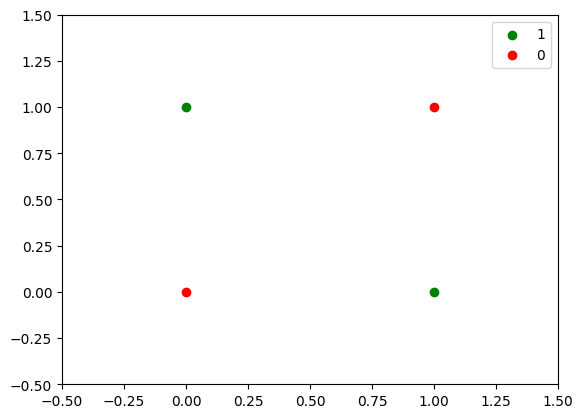

In [ ]:
X = [(0, 0), (1, 0), (0, 1), (1, 1)]
y = [0, 1, 1, 0]

for i, (x, y_) in enumerate(zip(X, y)):
    plt.scatter(*x, color='green' if y_ == 1 else 'red')

plt.scatter([], [], color='green', label='1')
plt.scatter([], [], color='red', label='0')
plt.legend()

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.show()

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

a = round(model.coef_[0], 3)
b = round(model.coef_[1], 3)
c = round(model.intercept_, 3)

print(f"Model: y = {a} * x1 + {b} * x2 + {c}")

Model: y = 0.0 * x1 + -0.0 * x2 + 0.5


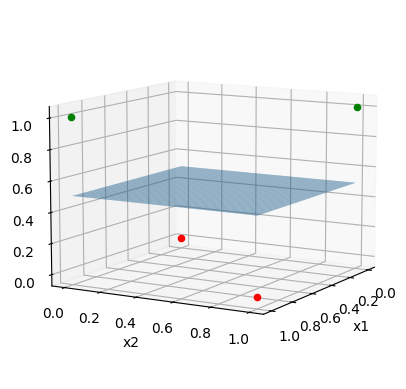

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
y = a * x1 + b * x2 + c

ax.plot_surface(x1, x2, y, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X_xor = [(0, 0), (1, 0), (0, 1), (1, 1)]
y_xor = [0, 1, 1, 0]

for pt, label in zip(X_xor, y_xor):
    ax.scatter(pt[0], pt[1], label, color='green' if label == 1 else 'red')

ax.view_init(10, 30)
plt.show()

---
## Drzewa decyzyjne

Jednym z najprostszych modeli, ale jednocześnie bardzo mocnym, są drzewa decyzyjne. Idea jest prosta, dzielimy w jakiś sposób nasze dane na mniejsze zbiory, dopóki nie będziemy z nich zadowoleni.

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/Dane_01.svg?raw=1" width="800"/>

Jeżeli chcielibyśmy rozbudować nasze drzewo decyzyjne, najprostszym sposobem jest dodanie nowego podziału w następujący sposób:

```
1. Wybierz losową cechę ze zbioru danych
2. Wybierz losowy liść
3. Znajdź podział, który da najlepszy wynik
```

<img src="https://github.com/aghbit/BIT-AI-Intro/blob/main/lab_01/assets/Dane.svg?raw=1" width="800"/>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

---
# Materiały

- Prawdopodobnie za łatwe, ale może coś się przyda:
  - [Kaggle - Mini Laby - Python](https://www.kaggle.com/learn/python)
  - [Kaggle - Mini Laby - Intro to Programming](https://www.kaggle.com/learn/intro-to-programming)

- Takie w sam raz:
  - [Kaggle - Mini Laby - Pandas](https://www.kaggle.com/learn/pandas)
  - [Kaggle - Mini Laby - Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)
  - [Kaggle - Mini Laby - Data Visualization](https://www.kaggle.com/learn/data-visualization)

- Trochę więcej o niektórych zagadnieniach:
  - [Kaggle - Notebook - Data Normalization](https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data)
  - [Kaggle - Notebook - One Hot Encoding](https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know)
  - [Kaggle - Notebook - Imbalanced Data](https://www.kaggle.com/code/shahules/tackling-class-imbalance)

- Lista innych modeli, których nie poruszyliśmy w tym labie:
  - [Scikit-learn API](https://scikit-learn.org/stable/api/index.html)
  - [Scikit-learn Examples](https://scikit-learn.org/stable/auto_examples/index.html)

- Proste papery:
  - [KNN - A](https://onlinelibrary.wiley.com/doi/full/10.1155/2021/5520990)
  - [KNN - B](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=9c11e93705e2dea51e7936f846ed2303b46a7a1d)

---
## Zadanie Domowe

W ramach przetestowania waszej wiedzy, zrobimy sobie małe zawody. Znaleźć je możecie na [Kaggle](https://www.kaggle.com/competitions/bit-ai-2025-intro-1). Celem jest stworzenie modelu, który będzie przewidywać to ile zbiorów będzie z jakichś roślin. Dane zostały wygenerowane syntetycznie, więc wartości mogą być trochę dziwne. Raczej nie ma szukać sensownych zależności w literaturze :)

### Wymagania
- Model nie może być siecią neuronową
- Odpowiedź musi być udzielona dla każdego wiersza z pliku **test.csv**, gdzie kolumny to odpowiednio
  - **id** - id rośliny
  - **yield** - ilość zbiorów

### Zasady
- Można łączyć się w zespoły (max 5 osób)
- Każdy zespół może wysyłać maksymalnie 5 zgłoszeń dziennie
- Zgłoszenia będą oceniane na podstawie metryki **MSE**
- Deadline zgłoszeń to **17.04.2025; 23:55**
- Wyniki będą odsłonięte **18.04.2025; 18:00**

### Nagrody
- Idk czy coś będzie, jak ktoś ładnie zaprezentuje rozwiązanie przy wszystkich to możemy o tym pomyśleć :)